# Experiment 1: Basic Implementation and Visalization of Artificial Neural Network

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [28]:
data = pd.read_csv("X:/Datasets/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.iloc[:,3:-1].values
Y = data.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],\
                      remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
ann = tf.keras.models.Sequential()

In [10]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [11]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 100, verbose = False)

In [27]:
#ann.summary()

In [13]:
Y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 826us/step


In [14]:
ann.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 993us/step - loss: 0.3415 - accuracy: 0.8620


[0.34154143929481506, 0.8619999885559082]

In [23]:
from ann_visualizer.visualize import ann_viz;

ann_viz(ann, title="An Artificial Neural Network")

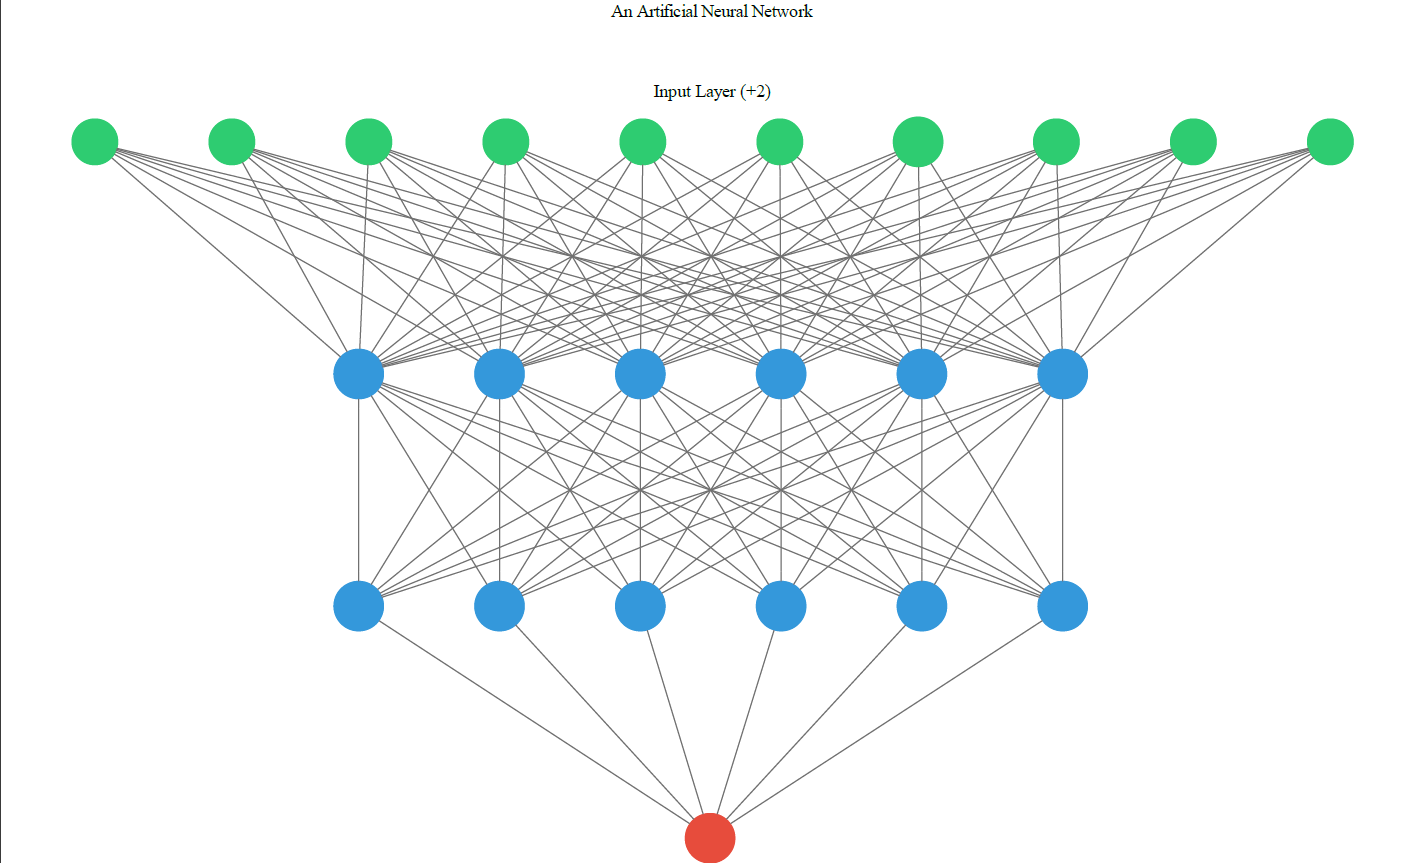

In [25]:
from IPython.display import Image
Image(filename='ann.png', height=500, width=750) 